In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [2]:
''' GENERATE THE DATA '''
N_trn = 100    # number of training samples
N_tst = 1000   # number of testing samples
D = 2          # dimension of data

X_trn = np.random.rand(N_trn,D)*2-1                 #uniformly sampled from the region [-1,1]x[-1,1]
Y_trn = np.sign( X_trn[:,0] * X_trn[:,1] )[:,None]  #XOR function
X_tst = np.random.rand(N_tst,D)*2-1                 #uniformly sampled from the region [-1,1]x[-1,1]
Y_tst = np.sign( X_tst[:,0] * X_tst[:,1] )[:,None]  #XOR function

print('data generated')

data generated


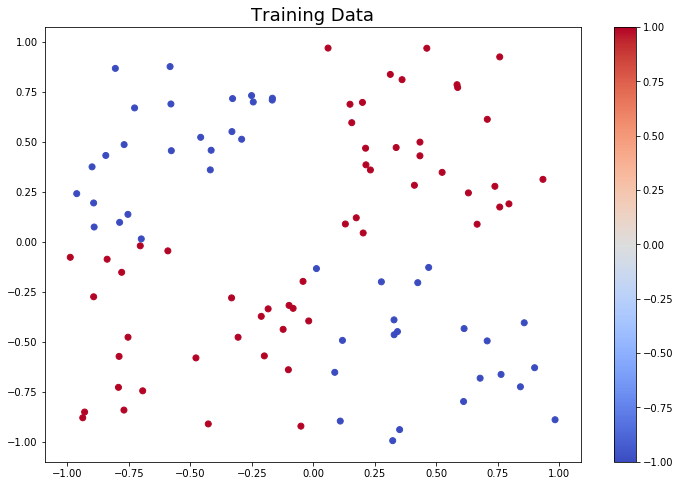

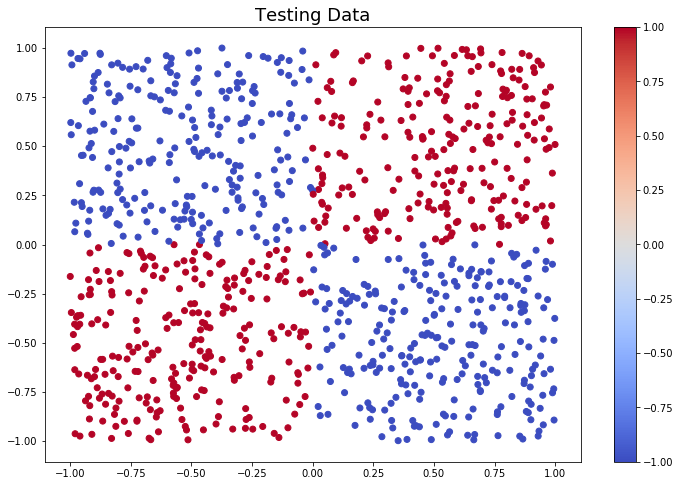

In [3]:
'''  PLOT THE DATA  '''
plt.rcParams['figure.figsize'] = [12,8]

plt.title("Training Data",fontsize=18)
plt.scatter(X_trn[:,0],X_trn[:,1],c=Y_trn[:,0],cmap='coolwarm')
plt.colorbar()
plt.show()

plt.title("Testing Data",fontsize=18)
plt.scatter(X_tst[:,0],X_tst[:,1],c=Y_tst[:,0],cmap='coolwarm')
plt.colorbar()
plt.show()

In [4]:
''' LOAD THE DATA INTO DATALOADER'''
from torch.utils.data import TensorDataset, DataLoader

batch_size = 128
tensor_dataset = TensorDataset(torch.from_numpy(X_trn).float(),
                               torch.from_numpy(Y_trn).float())
data_loader = DataLoader(dataset=tensor_dataset, batch_size=batch_size, shuffle=True)


In [22]:
''' INITIALIZE THE NETWORK '''
hidden_size = 8
model = nn.Sequential(
                nn.Linear(D,hidden_size),
                nn.ReLU(),
                nn.Linear(hidden_size,hidden_size),
                nn.ReLU(),
                nn.Linear(hidden_size,1,bias=False),)

In [23]:
''' INITIALIZE THE OPTIMIZER '''
learning_rate = 1e-1
optimizer = torch.optim.SGD( model.parameters(), lr=learning_rate) #stochastic gradient descent

learning_rate = 1e-1
learning_rate = 3e-1
learning_rate = 3e-2

optimizer = torch.optim.Adagrad( model.parameters(), lr=learning_rate)

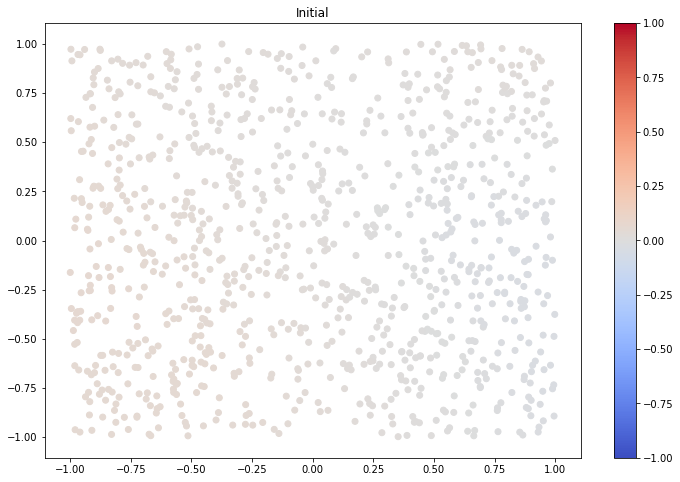

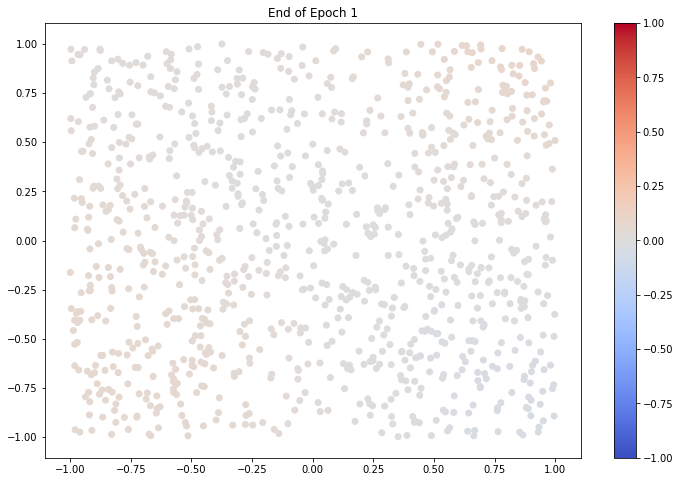

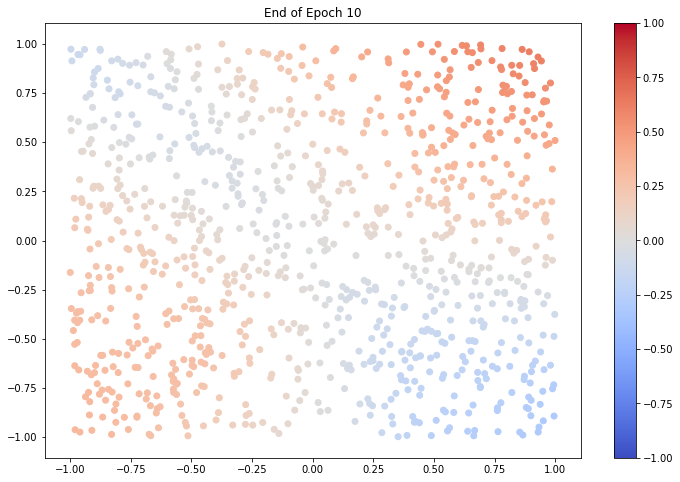

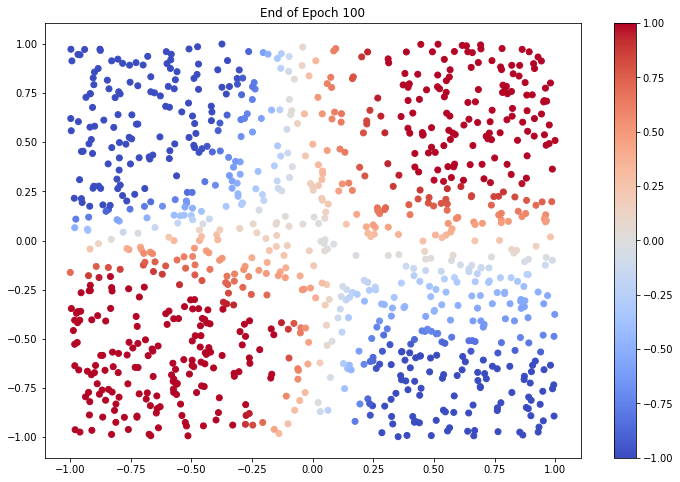

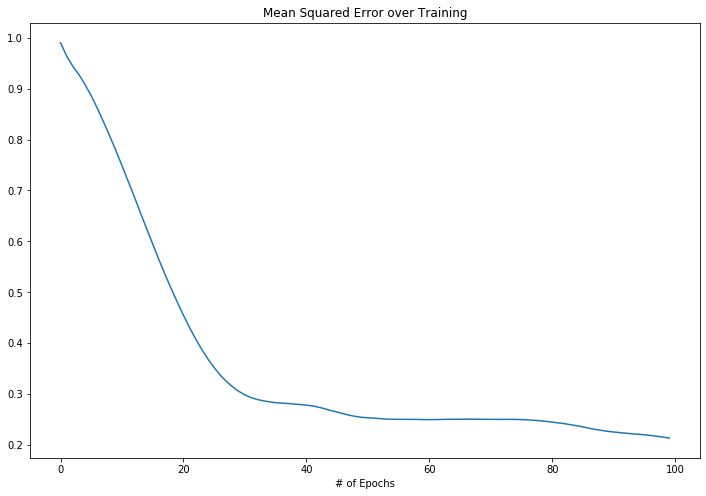

In [24]:
''' TRAIN THE NETWORK FOR 100 EPOCHS '''
total_epochs = 100
checkpoint_epochs = [1,10,100]

#model.eval()
y_full_pred = model(torch.Tensor(X_tst).float()).detach().numpy()
#model.train()

plt.title("Initial")
plt.scatter(X_tst[:,0],X_tst[:,1],c=y_full_pred[:,0],cmap='coolwarm')
plt.colorbar()
plt.clim(-1,1)
plt.show()
        
mse_losses = []
for epoch in range(total_epochs):
    
    avg_mse_per_epoch = 0
    for k,(x_batch,y_batch) in enumerate(data_loader):
        
        y_pred = model(x_batch)                      #compute the predictions
        mse_loss = torch.mean( (y_batch-y_pred)**2 ) #mean squared error
        avg_mse_per_epoch+=mse_loss.item()           #record the mse
        
        mse_loss.backward()  #compute the gradients
        optimizer.step()     #take the gradient step
        
    avg_mse_per_epoch /= (k+1)
    mse_losses.append(avg_mse_per_epoch)
    
    if (epoch+1) in checkpoint_epochs:
        y_full_pred = model(torch.Tensor(X_tst).float()).detach().numpy()
        plt.title("End of Epoch "+str(epoch+1))
        plt.scatter(X_tst[:,0],X_tst[:,1],c=y_full_pred[:,0],cmap='coolwarm')
        plt.colorbar()
        plt.clim(-1,1)
        plt.show()

plt.title("Mean Squared Error over Training")
plt.xlabel("# of Epochs")
plt.plot(list(range(total_epochs)),mse_losses)
#plt.ylim(0,1)
plt.show()